# EDA

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sweetviz as sv
from sklearn.model_selection import train_test_split

## Data Load and Split

In [2]:
x_df = pd.read_csv('../data/features5.csv')
y_df = pd.read_csv('../data/labels.csv')

display(x_df.head())
display(y_df.head())

,username,link_karma,comment_karma,account_age,is_verified,avg_cosine_similarity,all_users_similarity,avg_comment_length,max_comment_length,min_comment_length,comment_post_ratio,avg_thread_depth,parent_child_similarity,avg_ttr,avg_flesch_kincaid_grade,ngram_overlap,avg_score,avg_num_replies
0,yakfsh1,19830.0,88232.0,1440.0,True,1.0,0.019249,368.00,368.0,368.0,1.0,0.666667,0.030395,0.955981,9.20000,0.002070,1173.666667,2.111111
1,Tsquare43,699100.0,720902.0,3636.0,True,1.0,0.015121,62.00,62.0,62.0,1.0,1.619048,0.037736,0.955845,7.07619,0.000198,26.571429,0.333333
2,SeaSpeakToMe,236.0,11628.0,1029.0,True,NaN,0.012001,90.25,141.0,64.0,1.0,1.000000,0.121246,1.000000,1.30000,0.000000,3.000000,0.000000
3,hurtingxliving,848.0,1275.0,2001.0,True,NaN,0.014932,37.00,37.0,37.0,1.0,0.000000,0.000000,0.888889,12.60000,0.000000,6.000000,0.000000
4,Minute-Photo6916,1.0,4.0,12.0,True,NaN,0.008529,15.00,15.0,15.0,1.0,1.000000,0.000000,1.000000,-2.30000,0.000000,5.000000,0.000000


,username,is_bot
0,yakfsh1,False
1,Tsquare43,False
2,SeaSpeakToMe,False
3,hurtingxliving,False
4,Minute-Photo6916,False


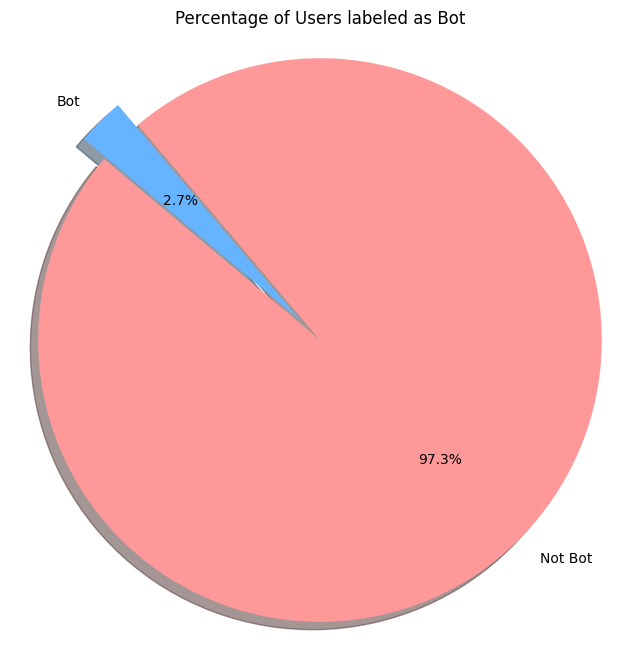

In [3]:
bot_counts = y_df['is_bot'].value_counts()

labels = ['Not Bot', 'Bot']
sizes = [bot_counts[False], bot_counts[True]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Users labeled as Bot')
plt.show()


In [4]:
def create_balanced_dataset(y_df, x_df, bot_ratio=0.4):
    merged_df = pd.merge(y_df, x_df, on='username')
    bot_users = merged_df[merged_df['is_bot'] == True]

    num_bots = len(bot_users)
    num_non_bots = int((num_bots / bot_ratio) - num_bots)
    non_bot_users = merged_df[merged_df['is_bot'] == False].sample(n=num_non_bots, random_state=42)
    balanced_df = pd.concat([bot_users, non_bot_users])

    new_y_df = balanced_df[['username', 'is_bot']]
    new_x_df = balanced_df.drop(columns=['is_bot'])
    
    return new_x_df, new_y_df

In [5]:
X_df_balanced, y_df_balanced = create_balanced_dataset(y_df, x_df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df_balanced, y_df_balanced, test_size=0.2, random_state=42, stratify=y_df_balanced['is_bot'])

## Auto EDA

In [7]:
df_train = X_train.merge(y_train, on='username', how="left")

In [8]:
sweet_report = sv.analyze(df_train, target_feat='is_bot')
sweet_report.show_html('../data/EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ../data/EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Conclusions**

Columns:
- username - to remove for a training
- link_karma - to standardisation, None to remove
- comment_karma - to standardisation, None to remove
- account_age - to standardisation, None to remove
- is_verified - to standardisation, None to remove
- avg_cosine_similarity - None replace with 0
- all_users_similarity - None replace with 0
- avg_comment_length - to standardisation, None replace with 0 before std
- max_comment_length - to standardisation, None replace with 0 before std
- min_comment_length - to standardisation, None replace with 0 before std
- comment_post_ratio - to standardisation, None replace with 1 after std
- avg_thread_depth - None replace with 0 (to repair)
- parent_child_similarity - to remove and repair
- avg_ttr - None replace with 0
- avg_flesch_kincaid_grade - to standardisation, None replace with 0 before std
- ngram_overlap - None replace with 0
- is_bot - change to 0, 1

ToDo: Repair avg_thread_depth and parent_child_similarity


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_distributions(X_train, y_train, class_column='is_bot'):
    # Ensure y_train is a 1-dimensional array
    y_train = y_train[class_column].values.flatten()
    
    # Combine X_train and y_train into a single DataFrame for easier plotting
    X_train = X_train.drop(columns=['username'])
    data = X_train.copy()
    data[class_column] = y_train
    
    # Plot the distribution of each feature
    for feature in X_train.columns:
        try:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=data, x=feature, hue=class_column, kde=True, bins=50, palette='viridis')
            plt.title(f'Distribution of {feature} by {class_column}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.legend(title=class_column)
            plt.show()
        except Exception as e:
            print(f"Error plotting {feature}: {e}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


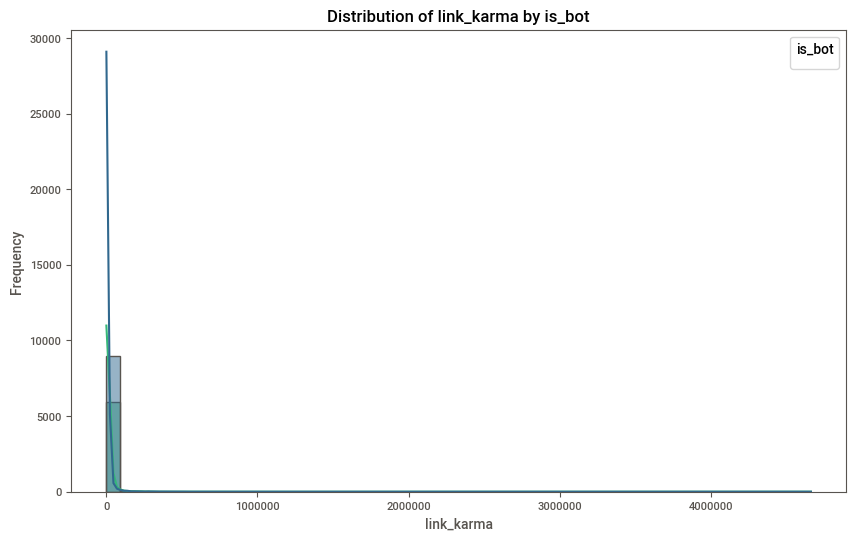

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


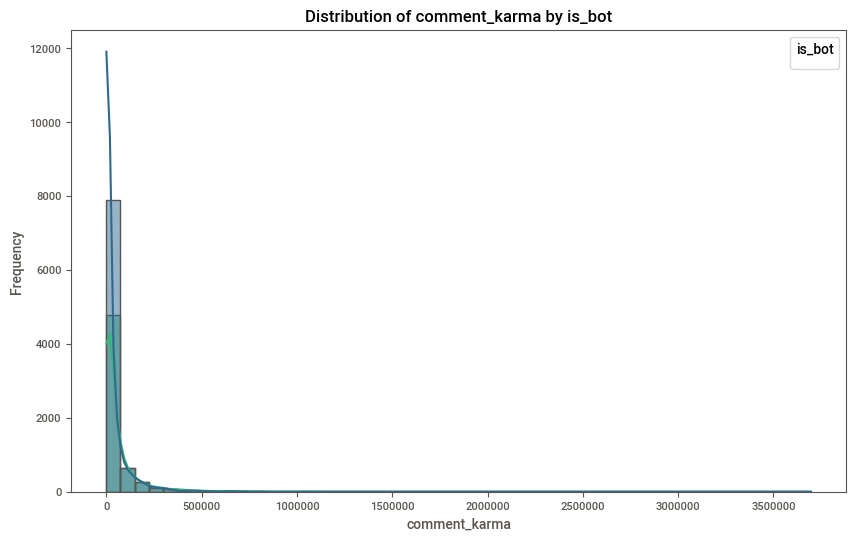

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


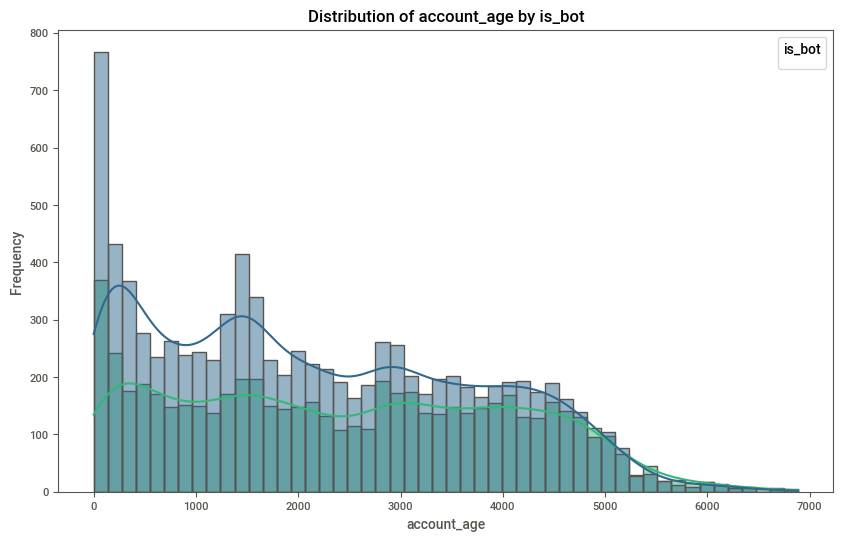

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


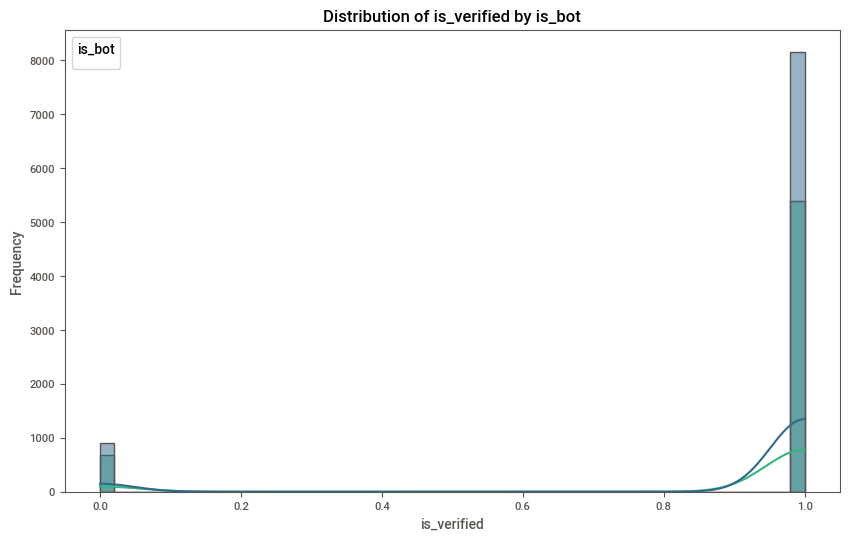

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error plotting avg_cosine_similarity: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


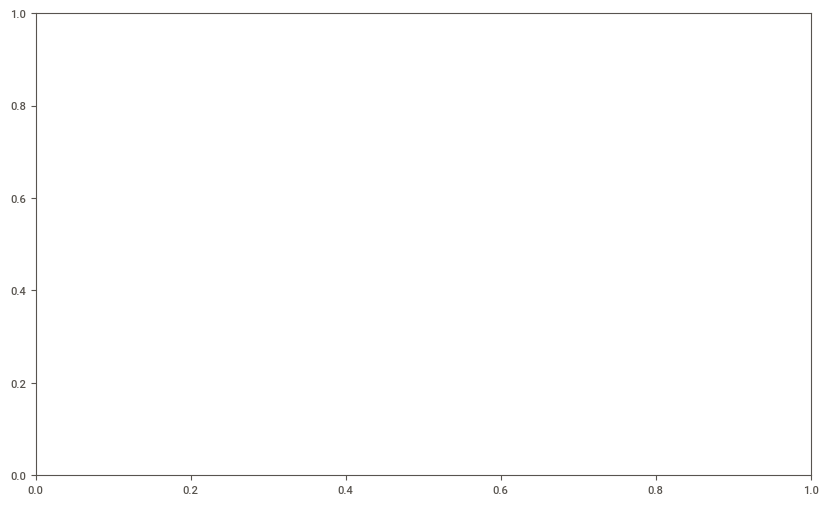

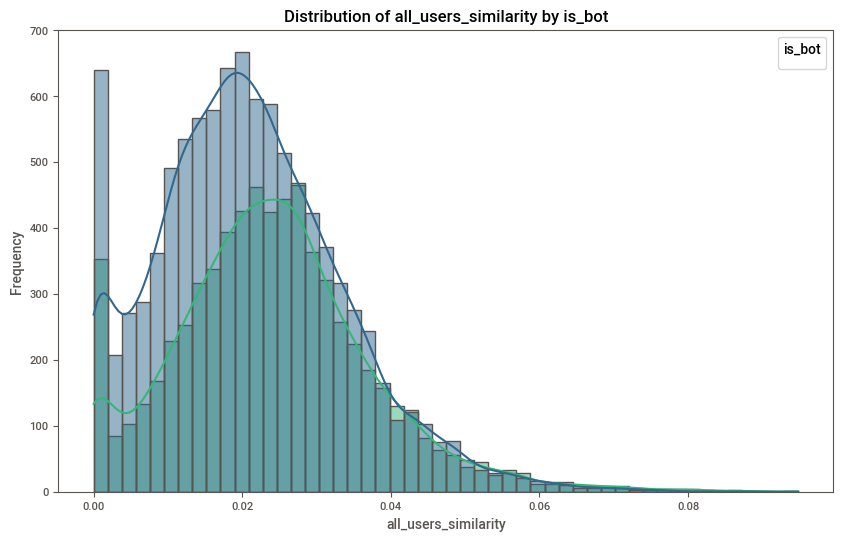

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


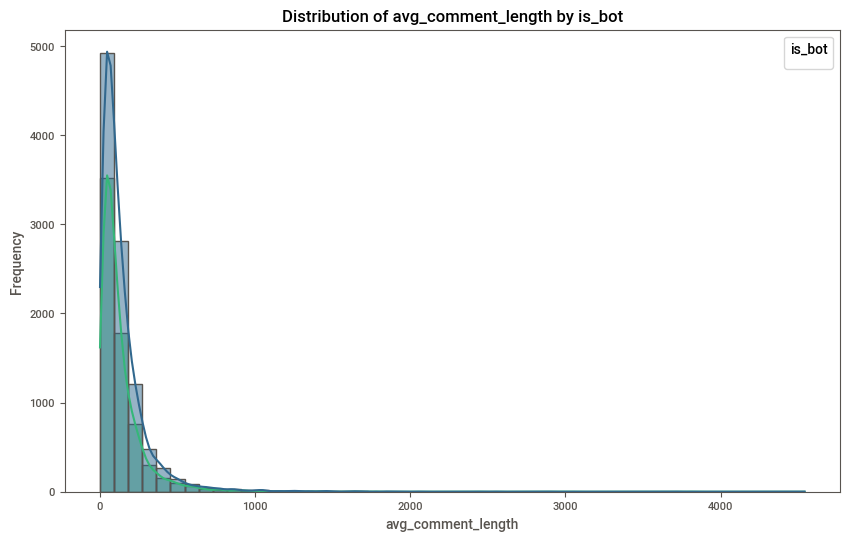

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


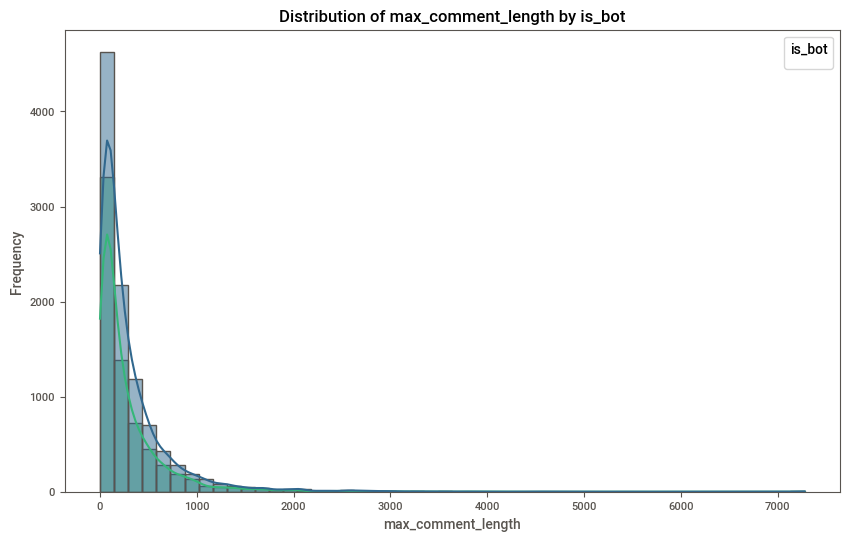

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


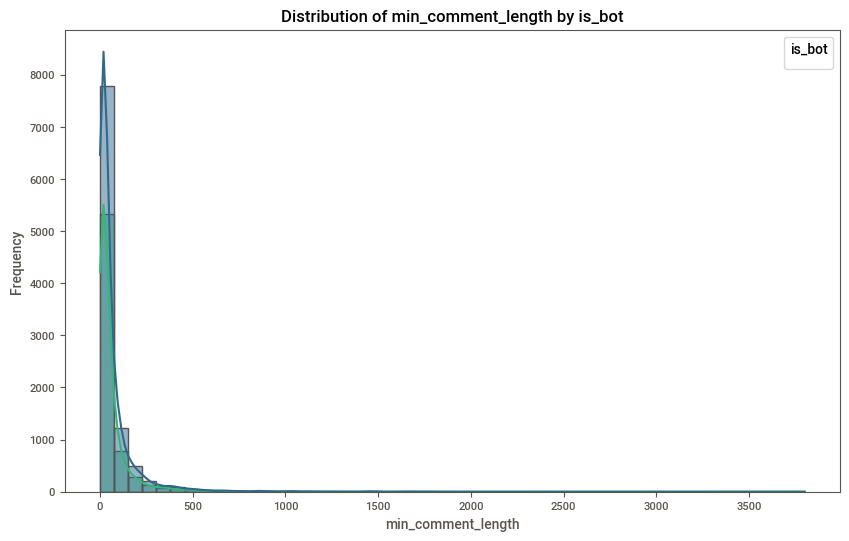

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


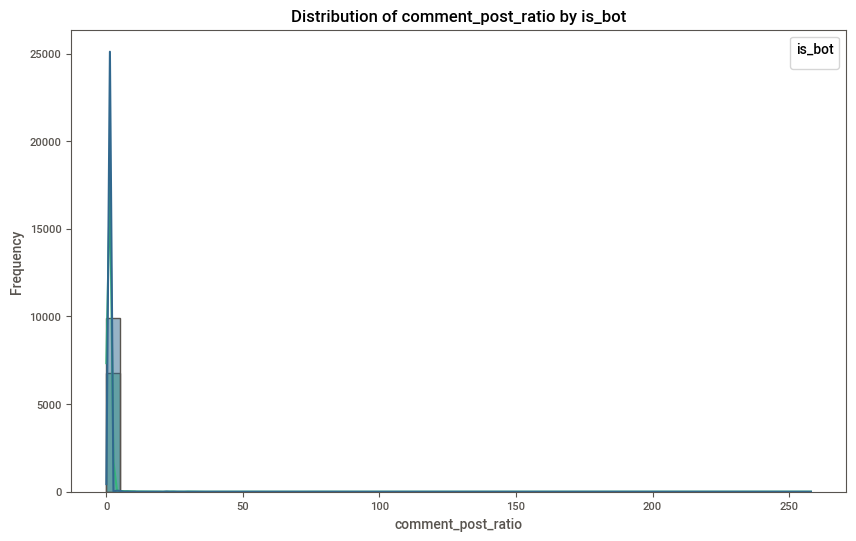

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


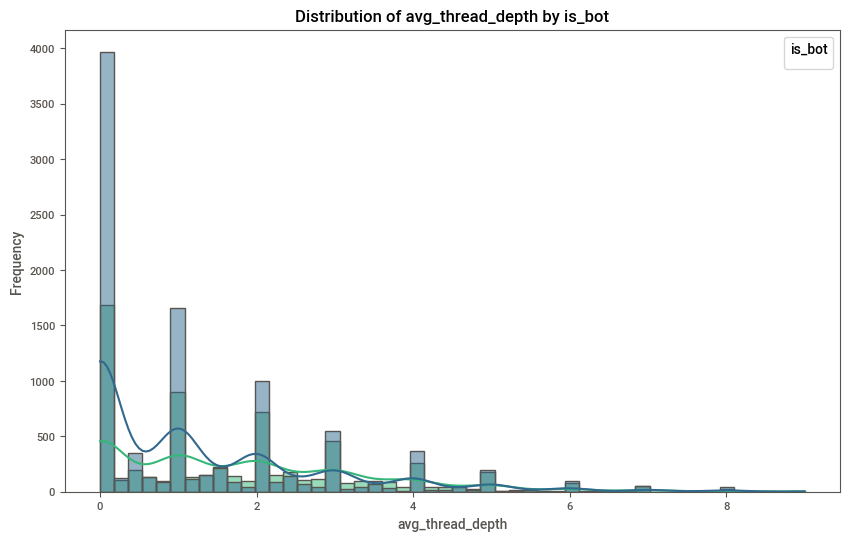

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


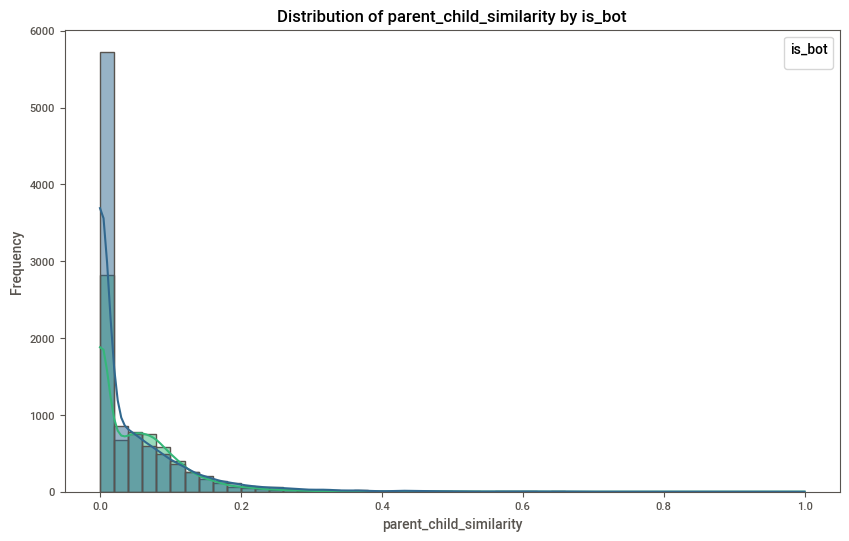

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


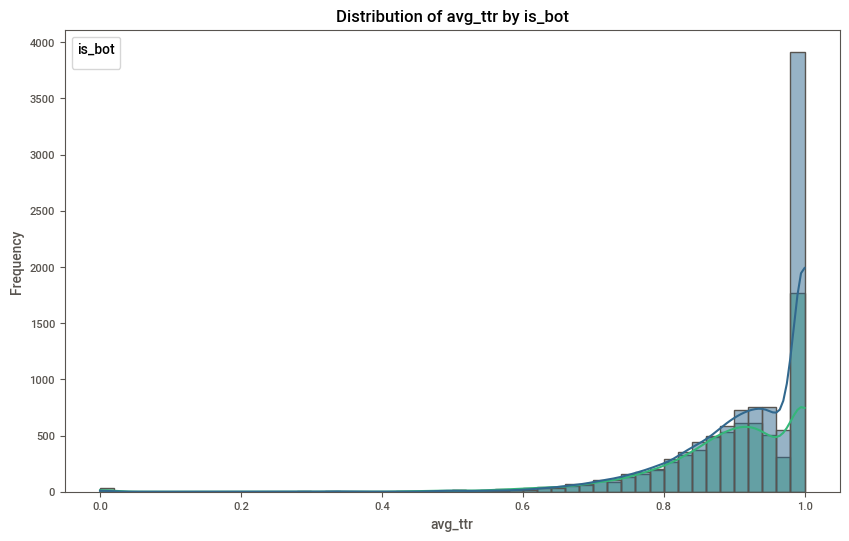

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


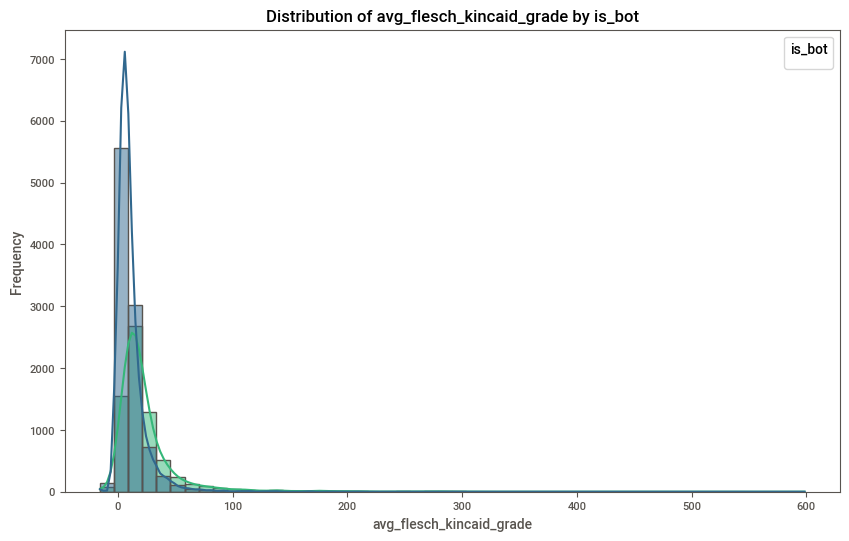

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


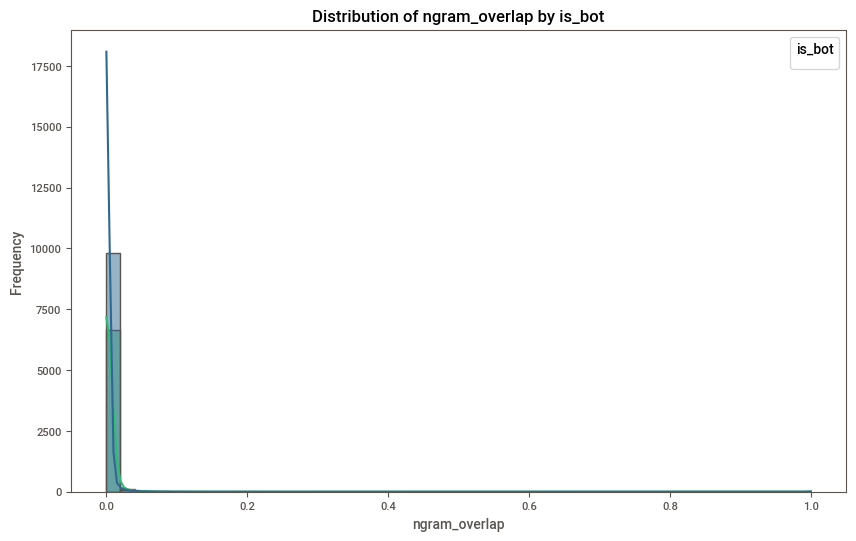

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


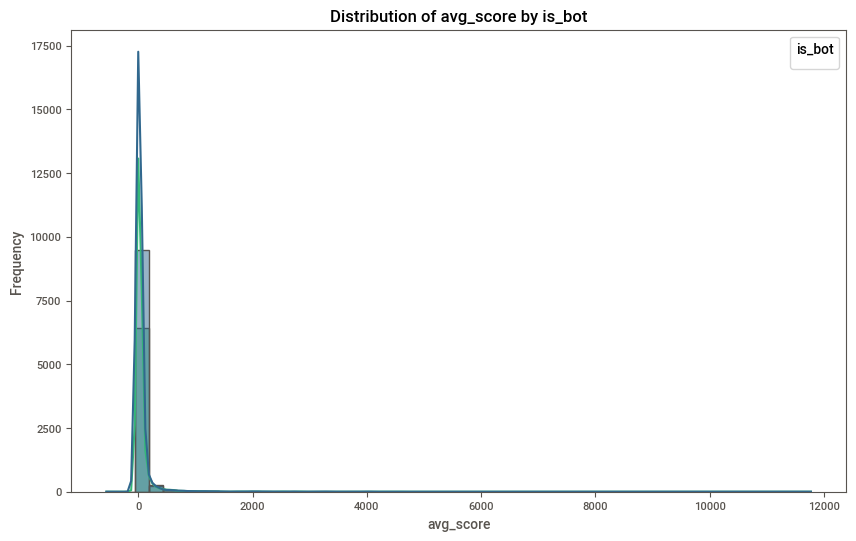

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


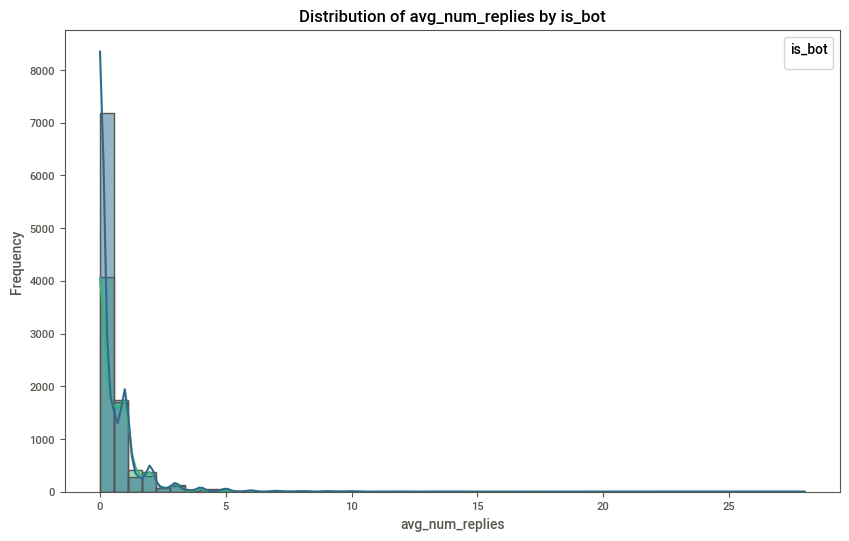

In [10]:
plot_feature_distributions(X_train, y_train)